<a href="https://colab.research.google.com/github/danielzcthang2002/LAP3/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install streamlit
# Install other dependencies if needed


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.7 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [16]:
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=a31094a2ec06e555103296258b3de21628ac5ef1c3e816c59044b3daf195828f
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install beautifulsoup4

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

file_id = '1jryjabbGEzFx20cyKc4Gplkk-KkLhoRJ'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)
print(df)

    age  experience  income
0    25           1   30450
1    30           3   35670
2    47           2   31580
3    32           5   40130
4    43          10   47830
5    51           7   41630
6    28           5   41340
7    33           4   37650
8    37           5   40250
9    39           8   45150
10   29           1   27840
11   47           9   46110
12   54           5   36720
13   51           4   34800
14   44          12   51300
15   41           6   38900
16   58          17   63600
17   23           1   30870
18   44           9   44190
19   37          10   48700


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #visualisation
import seaborn as sns #visualisation-2
from sklearn.linear_model import SGDRegressor #stochastic gradient descent regressor
from sklearn.preprocessing import StandardScaler #for scaling/normalizing
plt.style.use('ggplot')
np.set_printoptions(precision=3)

In [5]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [6]:
x_train = df[['age', 'experience']].values.astype(int) #featues as array
y_train = df['income'].values# target values
x_features = ['age', 'experience']

In [7]:
x_train

array([[25,  1],
       [30,  3],
       [47,  2],
       [32,  5],
       [43, 10],
       [51,  7],
       [28,  5],
       [33,  4],
       [37,  5],
       [39,  8],
       [29,  1],
       [47,  9],
       [54,  5],
       [51,  4],
       [44, 12],
       [41,  6],
       [58, 17],
       [23,  1],
       [44,  9],
       [37, 10]])

In [8]:
y_train

array([30450, 35670, 31580, 40130, 47830, 41630, 41340, 37650, 40250,
       45150, 27840, 46110, 36720, 34800, 51300, 38900, 63600, 30870,
       44190, 48700])

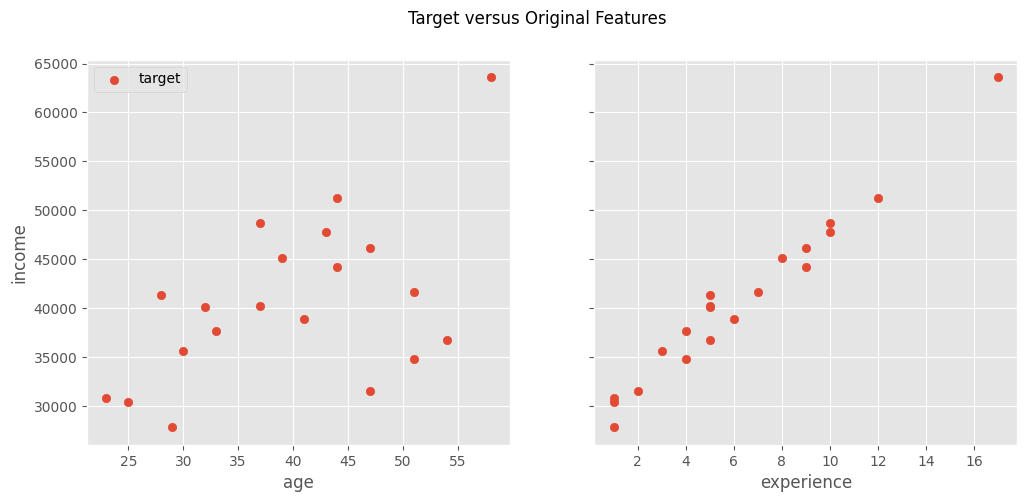

In [9]:
# plot targets vs original features
fig,ax = plt.subplots(1,2,figsize=(12,5),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("income"); ax[0].legend();
fig.suptitle("Target versus Original Features")
plt.show()

In [10]:
#Scaleing/ normalizing the training data
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[35 16]
Peak to Peak range by column in Normalized X:[3.581 3.98 ]


In [11]:
# Creating and fitting the regression model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 517, number of weight updates: 10341.0


In [12]:
#Viewing parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [-943.346 8667.002], b:[40735.168]


In [13]:
# make a prediction using sgdr.predict()
y_pred = sgdr.predict(x_norm)

#or

# make a prediction using w,b.
#y_pred = np.dot(x_norm, w_norm) + b_norm
print(f"Prediction on training set:\n{y_pred[:5]}" )
print(f"Target values: \n{y_train[:5]}")

Prediction on training set:
[30937.966 34767.372 30970.574 38886.331 48604.624]
Target values: 
[30450 35670 31580 40130 47830]


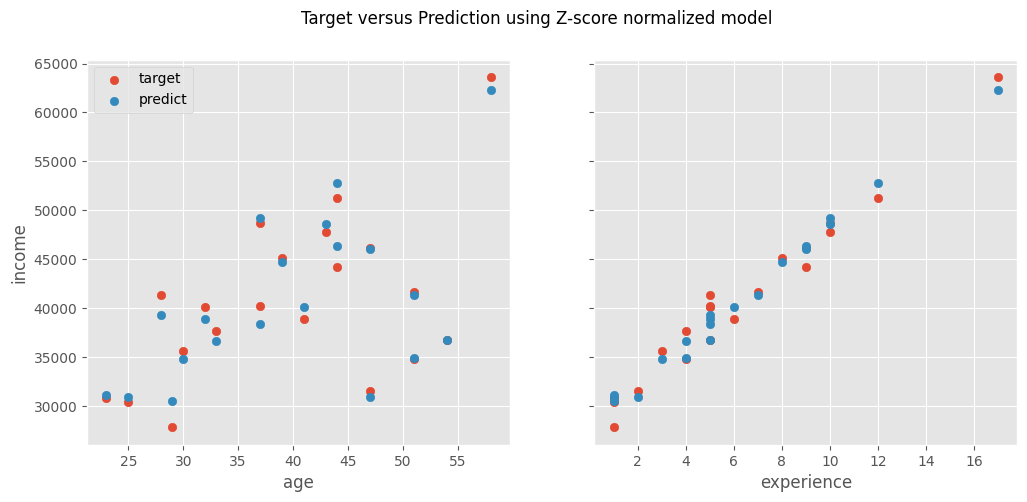

In [14]:
# plot predictions and targets vs original features
fig, ax = plt.subplots(1,2,figsize=(12,5),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("income"); ax[0].legend();
fig.suptitle("Target versus Prediction using Z-score normalized model")
plt.show()